In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings,datetime,calendar
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data[data['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [7]:
data[data['Quantity'] <= 0]['Quantity'].mean()

-45.60721009036145

In [8]:
data[data['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


In [9]:
Wrongindices = []

Wrongindices = list(data[data['Quantity']<=0].index)
Wrongindices.extend(data[data['UnitPrice']<=0].index)
len(Wrongindices), len(set(Wrongindices))

(13141, 11805)

In [10]:
Wrongindices = list(set(Wrongindices))
len(Wrongindices)

11805

In [11]:
data.drop(Wrongindices, axis=0, inplace=True)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.shape

(530104, 8)

In [12]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [13]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [14]:
'No ID' in data['CustomerID'].tolist()

False

In [15]:
data['CustomerID'].fillna('No ID', inplace=True)

In [16]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
data['Member'] = data['CustomerID'].apply(lambda x : 0 if x == 'No ID' else 1)
data['Member'].value_counts()

1    397884
0    132220
Name: Member, dtype: int64

In [18]:
dulicatedIndex = []
for i, row in enumerate(data.duplicated().tolist()):
    if row == True:
        dulicatedIndex.append(i)
len(dulicatedIndex)

5226

In [19]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)
data.shape

(524878, 9)

In [20]:
def ShowDetails() : 
    global data
    for col in data.columns : 
        print(f' for feature {col}')
        print(f'Number of Unique Values {len(data[col].unique())}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print('-------------------------------------------------------')

In [21]:
ShowDetails()

 for feature InvoiceNo
Number of Unique Values 19960
 Random Value 564717
 Random Value 548516
 Random Value 555096
-------------------------------------------------------
 for feature StockCode
Number of Unique Values 3922
 Random Value 23254
 Random Value 22364
 Random Value 22112
-------------------------------------------------------
 for feature Description
Number of Unique Values 4026
 Random Value ALARM CLOCK BAKELIKE PINK
 Random Value DOORMAT NEW ENGLAND
 Random Value FEATHER PEN,COAL BLACK
-------------------------------------------------------
 for feature Quantity
Number of Unique Values 375
 Random Value 6
 Random Value 1
 Random Value 8
-------------------------------------------------------
 for feature InvoiceDate
Number of Unique Values 18499
 Random Value 23-10-2011 16:19
 Random Value 10-11-2011 12:16
 Random Value 18-11-2011 15:59
-------------------------------------------------------
 for feature UnitPrice
Number of Unique Values 1291
 Random Value 2.1
 Random Val

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1


In [23]:
data[data['InvoiceNo']=='536365']['InvoiceDate'].unique()

array(['01-12-2010 08:26'], dtype=object)

In [24]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format = '%d-%m-%Y %H:%M')


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  object        
 7   Country      524878 non-null  object        
 8   Member       524878 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 36.0+ MB


In [26]:
data['Quantity'].min(),data['Quantity'].max()

(1, 80995)

In [27]:
data['InvoiceDate'].min(),data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [28]:
data['InvoiceDate'].max() - data['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [29]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['WeekDayCase'] = data['WeekDay'].apply(lambda x : 'WeekEnd' if str(x).lower() in ['saturday','sunday'] else 'WeekDay')
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay


In [30]:
data['WeekDayCase'].value_counts()

WeekDay    462539
WeekEnd     62339
Name: WeekDayCase, dtype: int64

In [31]:
data['WeekDay'].value_counts()

Thursday     100213
Tuesday       98726
Monday        92466
Wednesday     91467
Friday        79667
Sunday        62339
Name: WeekDay, dtype: int64

In [32]:
def DayPart(H) :
    
    if H <6 : 
        return 'Early Morning'
    elif 6<= H< 12 : 
        return 'Morning'
    elif 12<= H< 15 : 
        return 'Noon'
    elif 15<= H< 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [33]:
data['DayPart'] = data['Hour'].apply(lambda x : DayPart(int(x)))
data['DayPart'].value_counts()

Noon       211036
Evening    163759
Morning    145878
Night        4205
Name: DayPart, dtype: int64

In [34]:
data['Desc Char Length'] = data['Description'].apply(lambda x :  len(x))
data['Desc Word Length'] = data['Description'].apply(lambda x :  len(x.split()))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5


In [35]:
data['Desc Char Length'].min(),data['Desc Char Length'].max()

(6, 35)

In [36]:
data[data['Desc Char Length']==6]['Description'].unique()

array(['Manual'], dtype=object)

In [37]:
data[data['Desc Char Length']==35]['Description'].unique()

array(['KNITTED UNION FLAG HOT WATER BOTTLE',
       'ROUND SNACK BOXES SET OF4 WOODLAND ',
       'CHARLIE & LOLA WASTEPAPER BIN FLORA',
       'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN',
       'COLOUR GLASS T-LIGHT HOLDER HANGING',
       'CLASSIC METAL BIRDCAGE PLANT HOLDER',
       'FRIDGE MAGNETS LES ENFANTS ASSORTED',
       'SET/20 RED RETROSPOT PAPER NAPKINS ',
       'DISCO BALL ROTATOR BATTERY OPERATED',
       'BLUE NEW BAROQUE CANDLESTICK CANDLE',
       'GREEN DRAWER KNOB ACRYLIC EDWARDIAN',
       'SET/5 RED RETROSPOT LID GLASS BOWLS',
       'ROTATING SILVER ANGELS T-LIGHT HLDR',
       'SQUARECUSHION COVER PINK UNION FLAG',
       'SET 12 LAVENDER  BOTANICAL T-LIGHTS',
       'MAGIC DRAWING SLATE CIRCUS PARADE  ',
       'PAINTED METAL STAR WITH HOLLY BELLS',
       'PAINTED METAL HEART WITH HOLLY BELL',
       'FOLDING UMBRELLA PINKWHITE POLKADOT',
       'FOLDING UMBRELLA WHITE/RED POLKADOT',
       'FOLDING UMBRELLA RED/WHITE POLKADOT',
       'SET OF 20 VINTAGE CHRISTMA

In [38]:
data['Desc Word Length'].min(),data['Desc Word Length'].max()

(1, 8)

In [39]:
data[data['Desc Word Length']==1]['Description'].unique()

array(['POSTAGE', 'CARRIAGE', 'Manual', 'SOMBRERO ', 'SAMPLES'],
      dtype=object)

In [40]:
data[data['Desc Word Length']==8]['Description'].unique()

array(['SET OF 2 TEA TOWELS APPLE AND PEARS',
       'SET OF 6 3D KIT CARDS FOR KIDS',
       'SET OF 12 MINI BUNNIES IN A BUCKET',
       'HEN HOUSE W FAMILY IN BARN & NEST',
       'MAXWELL 2 TONE BLUE 60 PAGE PHOTO A',
       'FOOD COVER WITH BEADS , SET 2 SIZES',
       'SET OF 60 I LOVE LONDON CAKE CASES ',
       'SET 10 CARDS 12 DAYS OF XMAS 17059'], dtype=object)

In [41]:
AllDescription = ' '.join(data['Description'].tolist())
AllDescription = ' '.join([(i).lower() for i in AllDescription.split()])
len(AllDescription)

14392144

In [42]:
len(AllDescription.split())

2303213

In [43]:
AllDescription[:1000]

"white hanging heart t-light holder white metal lantern cream cupid hearts coat hanger knitted union flag hot water bottle red woolly hottie white heart. set 7 babushka nesting boxes glass star frosted t-light holder hand warmer union jack hand warmer red polka dot assorted colour bird ornament poppy's playhouse bedroom poppy's playhouse kitchen feltcraft princess charlotte doll ivory knitted mug cosy box of 6 assorted colour teaspoons box of vintage jigsaw blocks box of vintage alphabet blocks home building block word love building block word recipe box with metal heart doormat new england jam making set with jars red coat rack paris fashion yellow coat rack paris fashion blue coat rack paris fashion bath building block word alarm clock bakelike pink alarm clock bakelike red alarm clock bakelike green panda and bunnies sticker sheet stars gift tape inflatable political globe vintage heads and tails card game set/2 red retrospot tea towels round snack boxes set of4 woodland spaceboy lu

In [44]:
MostRepeatedWords = {}
for word in AllDescription.split():
    if word in MostRepeatedWords.keys():
        MostRepeatedWords[word] += 1
    else:
        MostRepeatedWords[word] = 1
        
    
MostRepeatedWords

{'white': 20198,
 'hanging': 16452,
 'heart': 37841,
 't-light': 14063,
 'holder': 15710,
 'metal': 20396,
 'lantern': 2270,
 'cream': 7760,
 'cupid': 333,
 'hearts': 4910,
 'coat': 1570,
 'hanger': 2145,
 'knitted': 786,
 'union': 5344,
 'flag': 1745,
 'hot': 10293,
 'water': 9771,
 'bottle': 11463,
 'red': 41742,
 'woolly': 438,
 'hottie': 438,
 'heart.': 438,
 'set': 53069,
 '7': 623,
 'babushka': 3155,
 'nesting': 498,
 'boxes': 3145,
 'glass': 11527,
 'star': 5948,
 'frosted': 154,
 'hand': 4796,
 'warmer': 4479,
 'jack': 3723,
 'polka': 194,
 'dot': 107,
 'assorted': 7359,
 'colour': 6040,
 'bird': 5743,
 'ornament': 1476,
 "poppy's": 1422,
 'playhouse': 1422,
 'bedroom': 425,
 'kitchen': 3455,
 'feltcraft': 7041,
 'princess': 1164,
 'charlotte': 6213,
 'doll': 2183,
 'ivory': 7943,
 'mug': 7917,
 'cosy': 1276,
 'box': 23554,
 'of': 52015,
 '6': 12865,
 'teaspoons': 210,
 'vintage': 32964,
 'jigsaw': 1623,
 'blocks': 502,
 'alphabet': 3830,
 'home': 9275,
 'building': 1686,
 'blo

In [45]:
len(MostRepeatedWords.keys())

2351

In [46]:
MostRepeatedWords=  {k:v for k,v in sorted(MostRepeatedWords.items(),key = lambda item: item[1],reverse = True) }
MostRepeatedWords

{'set': 53069,
 'of': 52015,
 'bag': 50823,
 'red': 41742,
 'heart': 37841,
 'retrospot': 34124,
 'vintage': 32964,
 'design': 29200,
 'pink': 28869,
 'christmas': 24587,
 'box': 23554,
 'jumbo': 20724,
 'cake': 20681,
 'metal': 20396,
 'white': 20198,
 'blue': 18804,
 'lunch': 18007,
 '3': 17893,
 'sign': 16677,
 'hanging': 16452,
 'holder': 15710,
 'pack': 15319,
 'paper': 14135,
 't-light': 14063,
 'small': 13945,
 'card': 13058,
 '6': 12865,
 'decoration': 12716,
 'wooden': 12435,
 'polkadot': 12228,
 'cases': 11721,
 'glass': 11527,
 'tea': 11519,
 'bottle': 11463,
 '12': 11191,
 'in': 10959,
 'and': 10606,
 'spaceboy': 10570,
 'hot': 10293,
 'water': 9771,
 'with': 9519,
 'large': 9428,
 'pantry': 9403,
 'home': 9275,
 'tin': 9191,
 'rose': 9163,
 'paisley': 9149,
 '4': 8925,
 'green': 8865,
 'ceramic': 8757,
 'regency': 8613,
 'doormat': 8255,
 'dolly': 8221,
 'mini': 7970,
 'ivory': 7943,
 'mug': 7917,
 'bunting': 7881,
 'love': 7793,
 'cream': 7760,
 'girl': 7601,
 'party': 74

In [47]:
ImportantWords = ['bag','red','heart','retrospot','vintage','design','pink','christmas','box','jumbo'] 


In [48]:
GuessedWords  = ['car','electric','kitchen','electronic']

for Word in GuessedWords : 
    if Word in MostRepeatedWords.keys():
        print(f'for Word {Word} repeated {MostRepeatedWords[Word]}')

for Word car repeated 184
for Word kitchen repeated 3455
for Word electronic repeated 2


In [49]:
for Word in ImportantWords : 
    data[f'Repeated Word : {Word}'] = data['Description'].apply(lambda x : 1 if Word in x.lower() else 0)

In [50]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0


In [51]:
data[data['Repeated Word : red'] == 1]['Description']

4           RED WOOLLY HOTTIE WHITE HEART.
8                HAND WARMER RED POLKA DOT
22             RED COAT RACK PARIS FASHION
27               ALARM CLOCK BAKELIKE RED 
33         SET/2 RED RETROSPOT TEA TOWELS 
                        ...               
524836    RED FLOCK LOVE HEART PHOTO FRAME
524849           ALARM CLOCK BAKELIKE RED 
524861       RED RETROSPOT ROUND CAKE TINS
524862               DOORMAT RED RETROSPOT
524867           ALARM CLOCK BAKELIKE RED 
Name: Description, Length: 44727, dtype: object

In [52]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [53]:
dl = data[data['Country'] == 'Israel'].index
data.drop(dl, inplace=True)
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [54]:
ContinentsDict = {'Europe':['United Kingdom','France','Netherlands','Germany','Norway'
                            ,'EIRE','Switzerland','Spain', 'Poland', 'Portugal','Italy'
                            ,'Belgium','Lithuania','Iceland','Channel Islands','Denmark'
                            ,'Cyprus','Sweden','Finland','Austria','Greece','Czech Republic'
                            ,'European Community','Malta'],
              'Asia':['Japan','Bahrain','Palestine','Hong Kong','Singapore','Lebanon',
                      'United Arab Emirates','Saudi Arabia'],
              'Americans':['Canada',  'Brazil', 'USA'],
              'Other':['Australia','Unspecified','RSA']}
ContinentsDict

{'Europe': ['United Kingdom',
  'France',
  'Netherlands',
  'Germany',
  'Norway',
  'EIRE',
  'Switzerland',
  'Spain',
  'Poland',
  'Portugal',
  'Italy',
  'Belgium',
  'Lithuania',
  'Iceland',
  'Channel Islands',
  'Denmark',
  'Cyprus',
  'Sweden',
  'Finland',
  'Austria',
  'Greece',
  'Czech Republic',
  'European Community',
  'Malta'],
 'Asia': ['Japan',
  'Bahrain',
  'Palestine',
  'Hong Kong',
  'Singapore',
  'Lebanon',
  'United Arab Emirates',
  'Saudi Arabia'],
 'Americans': ['Canada', 'Brazil', 'USA'],
 'Other': ['Australia', 'Unspecified', 'RSA']}

In [55]:
def GetContinent(Country):
    global ContinentsDict
    for key in ContinentsDict.keys():
        if Country in ContinentsDict[key]:
            return key
        
data['Continent'] = data['Country'].apply(lambda x: GetContinent(x))

In [56]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe


In [57]:
for Continent in ContinentsDict.keys():
    Countries = ContinentsDict[Continent]
    print(f'For Continent {Continent}, Countries are {Countries}')
    print('--------------------------------')

For Continent Europe, Countries are ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Czech Republic', 'European Community', 'Malta']
--------------------------------
For Continent Asia, Countries are ['Japan', 'Bahrain', 'Palestine', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia']
--------------------------------
For Continent Americans, Countries are ['Canada', 'Brazil', 'USA']
--------------------------------
For Continent Other, Countries are ['Australia', 'Unspecified', 'RSA']
--------------------------------


In [68]:
from countryinfo import CountryInfo

In [69]:
CapitalsDict = {}

for Country in data['Country'].unique() : 
    try : 
        CapitalsDict[Country] = CountryInfo(Country).capital()
    except :
        print(Country)
CapitalsDict    

EIRE
Channel Islands
Unspecified
European Community


{'United Kingdom': 'London',
 'France': 'Paris',
 'Australia': 'Canberra',
 'Netherlands': 'Amsterdam',
 'Germany': 'Berlin',
 'Norway': 'Oslo',
 'Switzerland': 'Bern',
 'Spain': 'Madrid',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Italy': 'Rome',
 'Belgium': 'Brussels',
 'Lithuania': 'Vilnius',
 'Japan': 'Tokyo',
 'Iceland': 'Reykjavik',
 'Denmark': 'Copenhagen',
 'Cyprus': 'Nicosia',
 'Sweden': 'Stockholm',
 'Finland': 'Helsinki',
 'Austria': 'Vienna',
 'Bahrain': 'Manama',
 'Greece': 'Athens',
 'Hong Kong': 'City of Victoria',
 'Singapore': 'Singapore',
 'Lebanon': 'Beirut',
 'United Arab Emirates': 'Abu Dhabi',
 'Saudi Arabia': 'Riyadh',
 'Czech Republic': 'Prague',
 'Canada': 'Ottawa',
 'Brazil': 'Brasília',
 'USA': 'Washington D.C.',
 'Malta': 'Valletta',
 'RSA': 'Pretoria'}

In [70]:
CapitalsDict['EIRE'] = 'Dublin'
CapitalsDict['Channel Islands'] = 'Peter Port'
CapitalsDict

{'United Kingdom': 'London',
 'France': 'Paris',
 'Australia': 'Canberra',
 'Netherlands': 'Amsterdam',
 'Germany': 'Berlin',
 'Norway': 'Oslo',
 'Switzerland': 'Bern',
 'Spain': 'Madrid',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Italy': 'Rome',
 'Belgium': 'Brussels',
 'Lithuania': 'Vilnius',
 'Japan': 'Tokyo',
 'Iceland': 'Reykjavik',
 'Denmark': 'Copenhagen',
 'Cyprus': 'Nicosia',
 'Sweden': 'Stockholm',
 'Finland': 'Helsinki',
 'Austria': 'Vienna',
 'Bahrain': 'Manama',
 'Greece': 'Athens',
 'Hong Kong': 'City of Victoria',
 'Singapore': 'Singapore',
 'Lebanon': 'Beirut',
 'United Arab Emirates': 'Abu Dhabi',
 'Saudi Arabia': 'Riyadh',
 'Czech Republic': 'Prague',
 'Canada': 'Ottawa',
 'Brazil': 'Brasília',
 'USA': 'Washington D.C.',
 'Malta': 'Valletta',
 'RSA': 'Pretoria',
 'EIRE': 'Dublin',
 'Channel Islands': 'Peter Port'}

In [60]:
data['TotalPrice'] = data.apply(lambda x : x['Quantity'] * x['UnitPrice'],axis=1)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo,Continent,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,20.34


In [61]:
data['Quantity'].min(),data['Quantity'].max()

(1, 80995)

In [62]:
def QuantityLevel(x) : 
    x = int(x)
    if x < 10 : 
        return 'Low'
    elif 10<= x <100 : 
        return 'Medium'
    else :
        return 'Huge'
data['Quantity Level'] =data['Quantity'] .apply(lambda x : QuantityLevel(x))
data['Quantity Level'].value_counts()

Low       370616
Medium    147320
Huge        6650
Name: Quantity Level, dtype: int64

In [63]:
data['UnitPrice'].min(),data['UnitPrice'].max()

(0.001, 13541.33)

In [64]:
def UnitPriceLevel(x) : 
    x = int(x)
    if x < 1 : 
        return 'Cheap'
    elif 1<= x <10 : 
        return 'Medium'
    else :
        return 'Expensive'
data['UnitPrice Level'] =data['UnitPrice'] .apply(lambda x : UnitPriceLevel(x))
data['UnitPrice Level'].value_counts()

Medium       391194
Cheap        109508
Expensive     23884
Name: UnitPrice Level, dtype: int64

In [65]:
data['TotalPrice'].min(),data['TotalPrice'].max()

(0.001, 168469.6)

In [66]:
def TotalPriceLevel(x) : 
    x = int(x)
    if x < 5 : 
        return 'Cheap'
    elif 5<= x <20 : 
        return 'Medium'
    else :
        return 'Expensive'
data['TotalPriceLevel'] =data['TotalPrice'] .apply(lambda x : TotalPriceLevel(x))
data['TotalPriceLevel'].value_counts()

Medium       253019
Cheap        170774
Expensive    100793
Name: TotalPriceLevel, dtype: int64

In [67]:
data[data['InvoiceNo']=='536365']['StockCode'].unique()

array(['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'],
      dtype=object)

In [76]:
import re

In [78]:
data['StockCodeLetters'] = data['StockCode'].apply(lambda x :
                                                   re.sub("\d+", "", x).lower())
data['StockCodeLetters'].unique()

array(['a', '', 'b', 'g', 'e', 'post', 'l', 'c', 's', 'bl', 'n', 'd', 'f',
       't', 'h', 'm', 'p', 'j', 'r', 'dot', 'k', 'v', 'w', 'bank charges',
       'i', 'y', 'u', 'amazonfee', 'z', 'o', 'dcgs', 'gift__', 'dcgssboy',
       'dcgssgirl', 'pads'], dtype=object)

In [79]:
data['StockCodeLetters'].value_counts()

                471986
b                13744
a                12803
c                 6599
d                 3702
l                 2315
e                 2231
f                 1946
s                 1708
g                 1516
post              1126
m                  755
p                  748
dot                706
n                  686
k                  426
bl                 383
h                  374
j                  219
w                  179
u                  164
r                   90
v                   48
gift__              31
t                   15
i                   13
dcgssgirl           13
bank charges        12
dcgssboy            11
z                   10
dcgs                 9
y                    8
o                    5
pads                 3
amazonfee            2
Name: StockCodeLetters, dtype: int64

In [80]:
data['StockCodeOnlyDigits'] = data['StockCodeLetters'].apply(lambda x : 
                                                             'Yes' if x =='' 
                                                             else 'No')
data['StockCodeOnlyDigits'].value_counts()

Yes    471986
No      52600
Name: StockCodeOnlyDigits, dtype: int64

In [81]:
SeasonsDict = {'Winter':[12,1,2],'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11]}
data['Season'] = data['Month'].apply(lambda x : [i for i in list(
    SeasonsDict.keys()) if int(x) in SeasonsDict[i]][0])
data['Season'].value_counts()

Fall      189383
Winter    126736
Summer    108177
Spring    100290
Name: Season, dtype: int64

In [82]:
data['WeekEnd Case'] = data['WeekDay'].apply(
    lambda x : 'WeekEnd' if x in ['Sunday','Sunday'] else 'WeekDay')
data['WeekEnd Case'].value_counts()

WeekDay    462247
WeekEnd     62339
Name: WeekEnd Case, dtype: int64

In [83]:
def CPlot(data,feature) : 
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(data,feature,Limit=0) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(data[feature], shade=True)
    else : 
        Data = data[data[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)
def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
        
def JPlot(data,feature1,feature2,Type = 'scatter') : 
    sns.jointplot(data=data, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     

In [85]:
Data = data[::100]

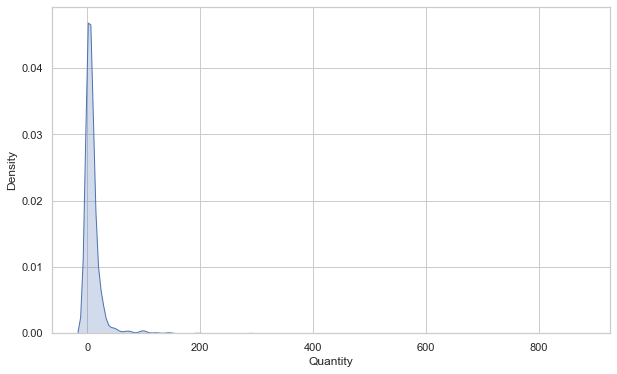

In [87]:
KPlot(Data,'Quantity')

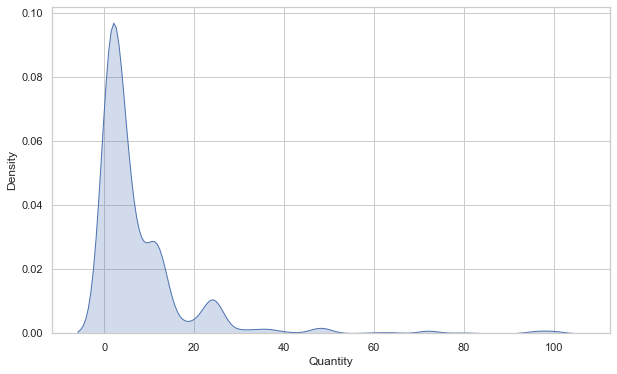

In [88]:
KPlot(Data,'Quantity',100)

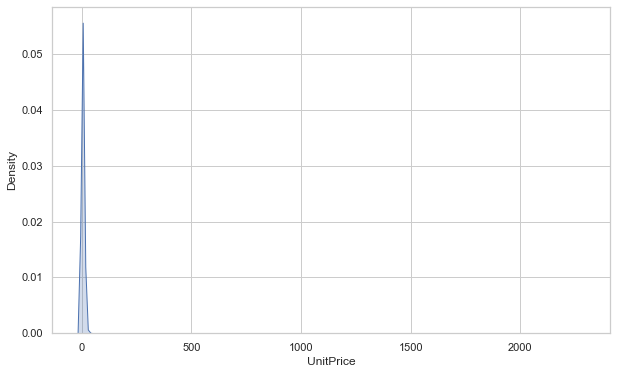

In [89]:
KPlot(Data,'UnitPrice')

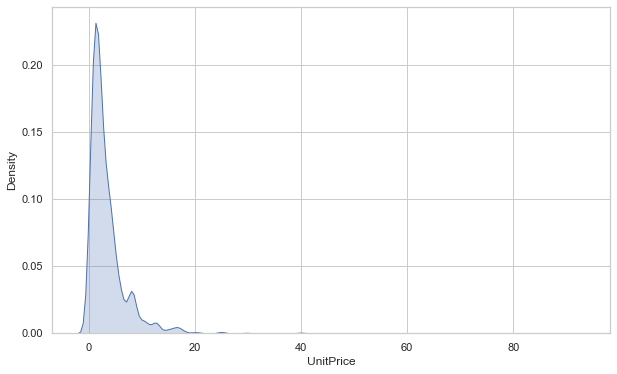

In [90]:
KPlot(Data,'UnitPrice',100)

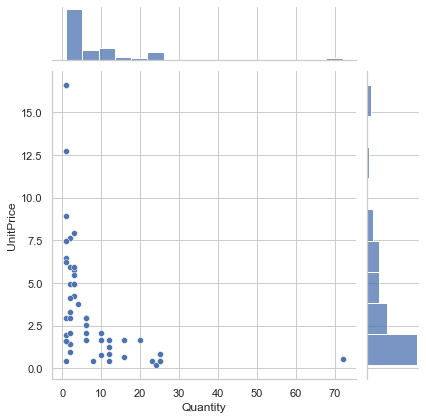

In [91]:
JPlot(Data[::100] ,'Quantity','UnitPrice')

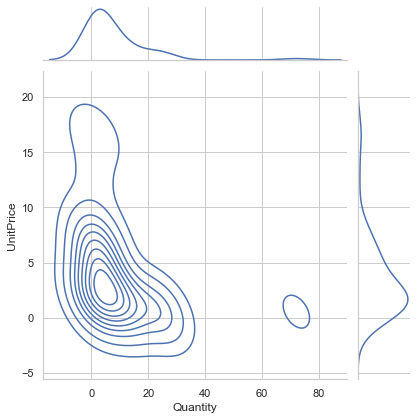

In [92]:
JPlot(Data[::100] ,'Quantity','UnitPrice','kde')

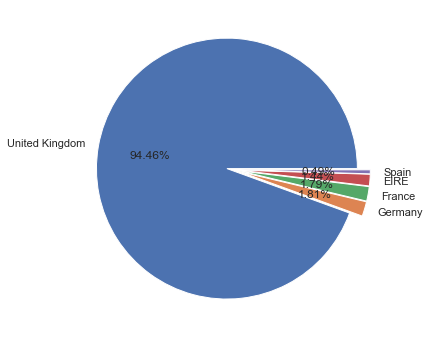

In [93]:
Pie(Data,'Country',5)

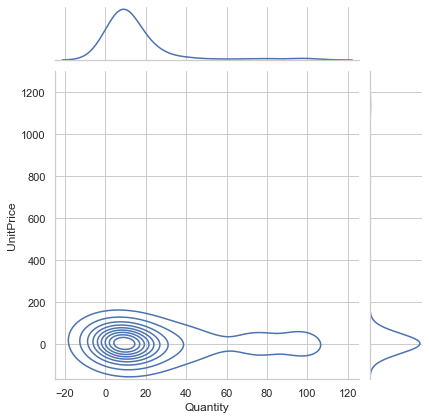

In [94]:
JPlot(Data[Data['Country']=='France'] ,'Quantity','UnitPrice','kde')

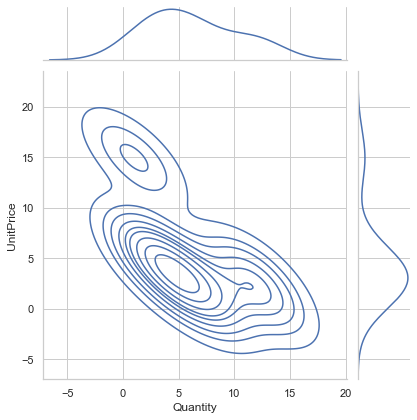

In [95]:
JPlot(Data[Data['Country']=='Italy'] ,'Quantity','UnitPrice','kde')

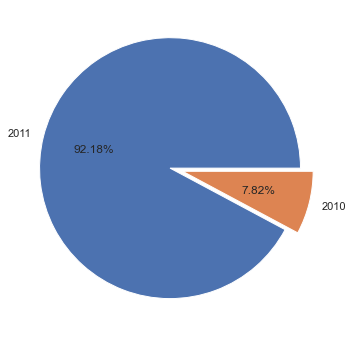

In [96]:
Pie(Data,'Year')

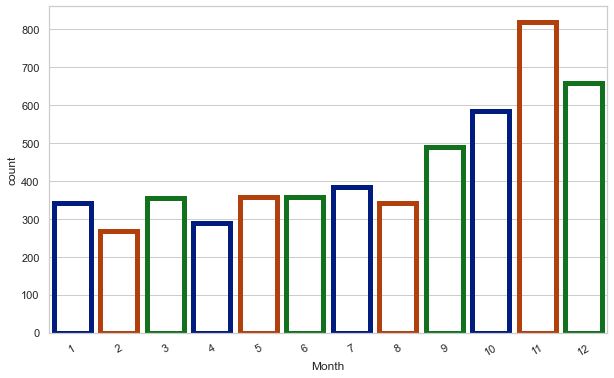

In [97]:
CPlot(Data,'Month')

In [98]:
data['YearMonth'] = data.apply(lambda x : str(x['Year']) + str(x['Month']),axis=1)
data['YearMonth'].unique()

array(['201012', '20111', '20112', '20113', '20114', '20115', '20116',
       '20117', '20118', '20119', '201110', '201111', '201112'],
      dtype=object)

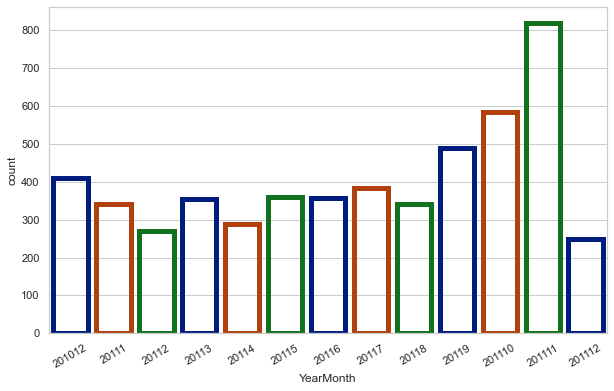

In [99]:
CPlot(data[::100],'YearMonth')

In [100]:
data.drop(['YearMonth'],axis=1,inplace=True)


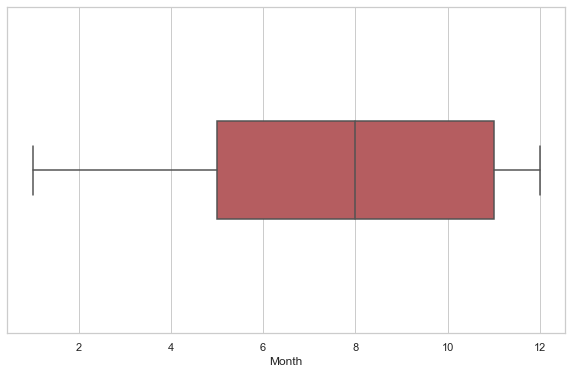

In [101]:
BPlot(Data,'Month')

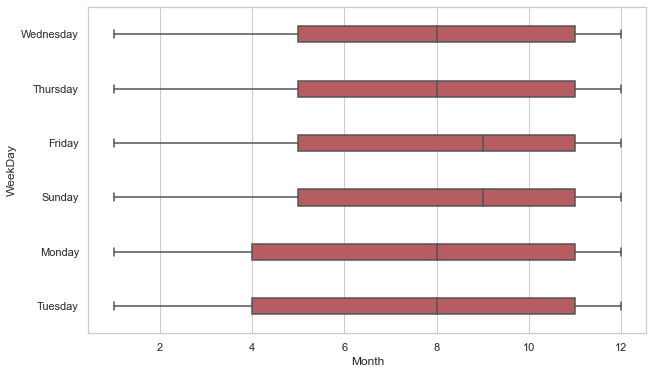

In [102]:
BPlot(Data,'Month','WeekDay')

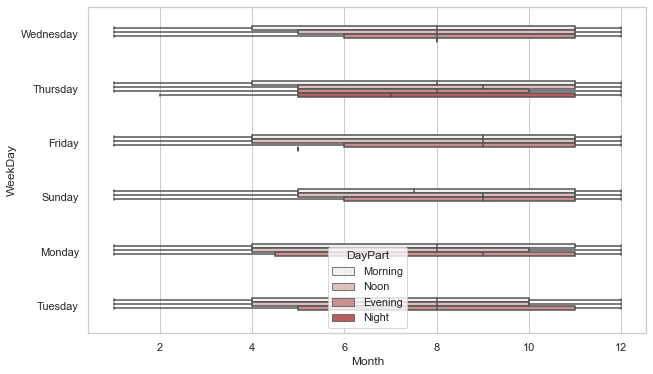

In [103]:
BPlot(Data,'Month','WeekDay','DayPart')

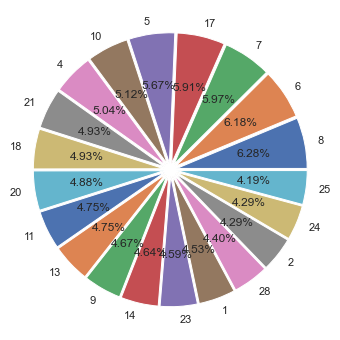

In [104]:
Pie(Data,'Day')

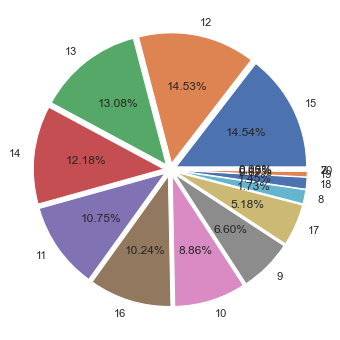

In [105]:
Pie(Data,'Hour')

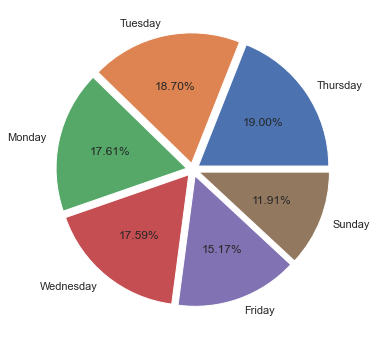

In [106]:
Pie(Data,'WeekDay')

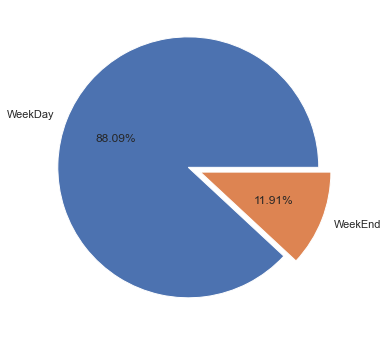

In [107]:
Pie(Data,'WeekEnd Case')

In [109]:
EncodedFeatures = ['Country','WeekDay','WeekDayCase','DayPart','Continent',
                   'Quantity Level','UnitPrice Level','TotalPriceLevel',
                   'StockCodeLetters','StockCodeOnlyDigits','Season','WeekEnd Case']

In [121]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Member', 'Year', 'Month', 'Day',
       'Hour', 'WeekDay', 'WeekDayCase', 'DayPart', 'Desc Char Length',
       'Desc Word Length', 'Repeated Word : bag', 'Repeated Word : red',
       'Repeated Word : heart', 'Repeated Word : retrospot',
       'Repeated Word : vintage', 'Repeated Word : design',
       'Repeated Word : pink', 'Repeated Word : christmas',
       'Repeated Word : box', 'Repeated Word : jumbo', 'Continent',
       'TotalPrice', 'Quantity Level', 'UnitPrice Level', 'TotalPriceLevel',
       'StockCodeLetters', 'StockCodeOnlyDigits', 'Season', 'WeekEnd Case',
       'Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase', 'Enc_DayPart',
       'Enc_Continent', 'Enc_Quantity Level', 'Enc_UnitPrice Level',
       'Enc_TotalPriceLevel', 'Enc_StockCodeLetters',
       'Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case'],
      dtype='object')

In [110]:
data[EncodedFeatures]

,Country,WeekDay,WeekDayCase,DayPart,Continent,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case
0,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Medium,a,No,Winter,WeekDay
1,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,,Yes,Winter,WeekDay
2,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,b,No,Winter,WeekDay
3,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,g,No,Winter,WeekDay
4,United Kingdom,Wednesday,WeekDay,Morning,Europe,Low,Medium,Expensive,e,No,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...
524873,France,Friday,WeekDay,Noon,Europe,Medium,Cheap,Medium,,Yes,Winter,WeekDay
524874,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay
524875,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay
524876,France,Friday,WeekDay,Noon,Europe,Low,Medium,Medium,,Yes,Winter,WeekDay


In [111]:
def ApplyEncoder(OriginalColumn) : 
    global data
    Encoder = LabelEncoder()
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [112]:
for Col in EncodedFeatures : 
    data[f'Enc_{Col}'] = ApplyEncoder(Col)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo,Continent,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,35,5,0,1,2,1,2,2,1,0,3,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,35,5,0,1,2,1,2,1,0,1,3,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,35,5,0,1,2,1,2,1,3,0,3,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,35,5,0,1,2,1,2,1,14,0,3,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,35,5,0,1,2,1,2,1,12,0,3,0


In [113]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Member', 'Year', 'Month', 'Day',
       'Hour', 'WeekDay', 'WeekDayCase', 'DayPart', 'Desc Char Length',
       'Desc Word Length', 'Repeated Word : bag', 'Repeated Word : red',
       'Repeated Word : heart', 'Repeated Word : retrospot',
       'Repeated Word : vintage', 'Repeated Word : design',
       'Repeated Word : pink', 'Repeated Word : christmas',
       'Repeated Word : box', 'Repeated Word : jumbo', 'Continent',
       'TotalPrice', 'Quantity Level', 'UnitPrice Level', 'TotalPriceLevel',
       'StockCodeLetters', 'StockCodeOnlyDigits', 'Season', 'WeekEnd Case',
       'Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase', 'Enc_DayPart',
       'Enc_Continent', 'Enc_Quantity Level', 'Enc_UnitPrice Level',
       'Enc_TotalPriceLevel', 'Enc_StockCodeLetters',
       'Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case'],
      dtype='object')

In [115]:
X = data[['Quantity','UnitPrice','CustomerID','Member','Year','Month','Day','Hour','Desc Char Length','Desc Word Length',
     'Repeated Word : bag','Repeated Word : red','Repeated Word : heart','Repeated Word : retrospot','Repeated Word : vintage',
     'Repeated Word : design','Repeated Word : pink','Repeated Word : christmas','Repeated Word : box',
     'TotalPrice','Enc_Country', 'Enc_WeekDay', 'Enc_WeekDayCase','Enc_DayPart','Enc_Continent','Enc_Quantity Level','Enc_UnitPrice Level',
     'Enc_TotalPriceLevel', 'Enc_StockCodeLetters','Enc_StockCodeOnlyDigits', 'Enc_Season', 'Enc_WeekEnd Case']]

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524586 entries, 0 to 524877
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Quantity                   524586 non-null  int64  
 1   UnitPrice                  524586 non-null  float64
 2   CustomerID                 524586 non-null  object 
 3   Member                     524586 non-null  int64  
 4   Year                       524586 non-null  int64  
 5   Month                      524586 non-null  int64  
 6   Day                        524586 non-null  int64  
 7   Hour                       524586 non-null  int64  
 8   Desc Char Length           524586 non-null  int64  
 9   Desc Word Length           524586 non-null  int64  
 10  Repeated Word : bag        524586 non-null  int64  
 11  Repeated Word : red        524586 non-null  int64  
 12  Repeated Word : heart      524586 non-null  int64  
 13  Repeated Word : retrospot  52

In [117]:
data['CustomerID'].value_counts()

No ID      132139
17841.0      7676
14911.0      5670
14096.0      5111
12748.0      4412
            ...  
17291.0         1
13270.0         1
17925.0         1
14424.0         1
16078.0         1
Name: CustomerID, Length: 4336, dtype: int64

In [118]:
data['CustomerID'].replace('No ID',0,inplace=True)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [128]:
X_ = pd.DataFrame(X_,columns = X.columns)
X_

,Quantity,UnitPrice,CustomerID,Member,Year,Month,Day,Hour,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,TotalPrice,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case
0,-0.029517,-0.038023,0.942846,0.580263,-3.434762,1.26761,-1.618833,-2.078931,1.359698,0.560895,-0.33134,-0.305178,3.171233,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,-0.018292,0.278883,1.397774,-0.367234,-0.386069,0.000151,-0.569638,0.567322,0.952756,0.063647,-2.995516,1.399951,-0.367234
1,-0.029517,-0.014756,0.942846,0.580263,-3.434762,1.26761,-1.618833,-2.078931,-1.425253,-1.272442,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,0.000253,0.278883,1.397774,-0.367234,-0.386069,0.000151,-0.569638,0.567322,-0.177147,-0.226902,0.333832,1.399951,-0.367234
2,-0.016723,-0.032483,0.942846,0.580263,-3.434762,1.26761,-1.618833,-2.078931,0.617044,0.560895,-0.33134,-0.305178,3.171233,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,0.006361,0.278883,1.397774,-0.367234,-0.386069,0.000151,-0.569638,0.567322,-0.177147,0.644745,-2.995516,1.399951,-0.367234
3,-0.029517,-0.014756,0.942846,0.580263,-3.434762,1.26761,-1.618833,-2.078931,1.545361,1.477564,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,0.000253,0.278883,1.397774,-0.367234,-0.386069,0.000151,-0.569638,0.567322,-0.177147,3.840780,-2.995516,1.399951,-0.367234
4,-0.029517,-0.014756,0.942846,0.580263,-3.434762,1.26761,-1.618833,-2.078931,0.617044,0.560895,-0.33134,3.276779,3.171233,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,0.000253,0.278883,1.397774,-0.367234,-0.386069,0.000151,-0.569638,0.567322,-0.177147,3.259683,-2.995516,1.399951,-0.367234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524581,0.008866,-0.085111,0.182607,0.580263,0.291141,1.26761,-0.695288,-0.440701,0.060054,0.560895,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,-0.037058,-3.402601,-1.526534,-0.367234,1.157564,0.000151,1.554654,-1.883144,0.952756,-0.226902,0.333832,1.399951,-0.367234
524582,-0.029517,-0.050488,0.182607,0.580263,0.291141,1.26761,-0.695288,-0.440701,0.245717,-0.355773,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,-0.028227,-3.402601,-1.526534,-0.367234,1.157564,0.000151,-0.569638,0.567322,0.952756,-0.226902,0.333832,1.399951,-0.367234
524583,-0.042311,0.006295,0.182607,0.580263,0.291141,1.26761,-0.695288,-0.440701,0.431381,-0.355773,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,-0.013509,-3.402601,-1.526534,-0.367234,1.157564,0.000151,-0.569638,0.567322,0.952756,-0.226902,0.333832,1.399951,-0.367234
524584,-0.042311,0.006295,0.182607,0.580263,0.291141,1.26761,-0.695288,-0.440701,0.802707,-0.355773,-0.33134,-0.305178,-0.315335,-0.263618,-0.258889,-0.245143,-0.244724,-0.221757,-0.234841,-0.013509,-3.402601,-1.526534,-0.367234,1.157564,0.000151,-0.569638,0.567322,0.952756,-0.226902,0.333832,1.399951,-0.367234


In [129]:
from sklearn.cluster import KMeans

In [130]:
KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=2,random_state=33)
KMeansModel.fit(X_)

Initialization complete
Iteration 0, inertia 20783163.81799295
Iteration 1, inertia 15507042.261786742
Iteration 2, inertia 15295663.980247974
Iteration 3, inertia 15169612.292100593
Iteration 4, inertia 15124440.846214885
Iteration 5, inertia 15100560.868700814
Iteration 6, inertia 15086536.179434685
Iteration 7, inertia 15082019.626124183
Iteration 8, inertia 15077086.91232441
Iteration 9, inertia 15072907.853311077
Iteration 10, inertia 15071433.75322175
Iteration 11, inertia 15070874.065412076
Iteration 12, inertia 15070512.289725216
Iteration 13, inertia 15070296.508217053
Iteration 14, inertia 15070197.87858463
Iteration 15, inertia 15070147.268344944
Iteration 16, inertia 15070126.449639566
Converged at iteration 16: center shift 4.1311581580850445e-05 within tolerance 0.00010000000000003473.
Initialization complete
Iteration 0, inertia 21197002.775611494
Iteration 1, inertia 15274351.179969305
Iteration 2, inertia 15084187.032466426
Iteration 3, inertia 15048953.513861395
Itera

KMeans(max_iter=1000, n_clusters=3, random_state=33, verbose=2)

In [131]:
import random
InertiaDict = {}
M = 0
for j in range(2,5) :
    for i in range(10) : 
        M+=1
        Columns = random.sample(set(X_.columns),j)
        KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=0,random_state=33)
        KMeansModel.fit(X_[Columns])
        InertiaValue = KMeansModel.inertia_/1000000
        InertiaDict[M] = [InertiaValue,Columns]
        print(f'for Columns {Columns} intertia is : {InertiaValue}')   

for Columns ['Repeated Word : retrospot', 'Enc_WeekDay'] intertia is : 0.14087789930522046
for Columns ['Enc_StockCodeOnlyDigits', 'Enc_WeekEnd Case'] intertia is : 0.048386037153222525
for Columns ['Enc_DayPart', 'Desc Word Length'] intertia is : 0.3558137076443001
for Columns ['Year', 'Enc_UnitPrice Level'] intertia is : 0.059756061057085336
for Columns ['Desc Char Length', 'Enc_UnitPrice Level'] intertia is : 0.2814795883157353
for Columns ['Repeated Word : bag', 'Repeated Word : design'] intertia is : 0.07217755486448622
for Columns ['Enc_DayPart', 'Hour'] intertia is : 0.08393988439403167
for Columns ['Repeated Word : design', 'Enc_StockCodeLetters'] intertia is : 0.09271143568609169
for Columns ['Year', 'Repeated Word : design'] intertia is : 0.02583733056741206
for Columns ['Enc_Country', 'Enc_StockCodeOnlyDigits'] intertia is : 0.0666774787544742
for Columns ['Hour', 'Repeated Word : design', 'Enc_UnitPrice Level'] intertia is : 0.5829673199384214
for Columns ['Repeated Word : 

In [132]:
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)

KMeansModel centers are :  [[ 3.17123293e+00  2.45950530e-02  2.50734388e-02 -2.21757067e-01]
 [-3.15334768e-01 -3.13258638e-03 -3.96415498e-03 -2.21757067e-01]
 [-1.23763556e-01  1.17215357e-02  2.61758057e-02  4.50943915e+00]]
KMeansModel labels are :  [0 1 0 ... 1 1 1]


In [133]:
data['Order Type'] = KMeansModel.labels_

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo,Continent,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,35,5,0,1,2,1,2,2,1,0,3,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,35,5,0,1,2,1,2,1,0,1,3,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,35,5,0,1,2,1,2,1,3,0,3,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,35,5,0,1,2,1,2,1,14,0,3,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,35,5,0,1,2,1,2,1,12,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,10.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,2,0,2,0,1,3,0,1
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,12.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,1
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,1
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,1


In [134]:
Types = {0:'Buying Gifts',1:'Small Business',2:'HouseHolds'}
data['Order Type'] = data['Order Type'].map(Types)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : jumbo,Continent,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,StockCodeLetters,StockCodeOnlyDigits,Season,WeekEnd Case,Enc_Country,Enc_WeekDay,Enc_WeekDayCase,Enc_DayPart,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_StockCodeLetters,Enc_StockCodeOnlyDigits,Enc_Season,Enc_WeekEnd Case,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,0,0,1,0,0,0,0,0,0,0,Europe,15.30,Low,Medium,Medium,a,No,Winter,WeekDay,35,5,0,1,2,1,2,2,1,0,3,0,Buying Gifts
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,,Yes,Winter,WeekDay,35,5,0,1,2,1,2,1,0,1,3,0,Small Business
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,0,1,0,0,0,0,0,0,0,Europe,22.00,Low,Medium,Expensive,b,No,Winter,WeekDay,35,5,0,1,2,1,2,1,3,0,3,0,Buying Gifts
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,0,0,0,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,g,No,Winter,WeekDay,35,5,0,1,2,1,2,1,14,0,3,0,Small Business
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,0,1,1,0,0,0,0,0,0,0,Europe,20.34,Low,Medium,Expensive,e,No,Winter,WeekDay,35,5,0,1,2,1,2,1,12,0,3,0,Buying Gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,0,0,0,0,0,0,0,0,0,0,Europe,10.20,Medium,Cheap,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,2,0,2,0,1,3,0,Small Business
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,0,0,0,0,0,0,0,0,0,0,Europe,12.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Small Business
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,0,0,0,0,0,0,0,0,0,0,Europe,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Small Business
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,0,0,0,0,0,0,0,0,0,0,Europe,16.60,Low,Medium,Medium,,Yes,Winter,WeekDay,13,0,0,3,2,1,2,2,0,1,3,0,Small Business
